Tomato plant leaf disease detection
1. Can add Data Augmentation step

In [ ]:
#Importing Libraries
%matplotlib inline
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import torchvision
from torchvision import datasets
from torchvision import models
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import glob
import time
import copy
#!pip install split-folders
!pip install torchsummary 

print("GPU available: {}".format(torch.cuda.is_available()))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
GPU available: True


In [ ]:
#Using GPU
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [ ]:
#Mounting from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''import splitfolders # or import splitfolders
input_folder = "/content/drive/MyDrive/Original PlantVillage Tomato disease dataset"
output = "/content/drive/MyDrive/Tomato disease dataset new" #where you want the split datasets saved. one will be created if it does not exist or none is set
splitfolders.ratio(input_folder, 
                   output=output, 
                   seed=42, 
                   ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.
                  '''

'import splitfolders # or import splitfolders\ninput_folder = "/content/drive/MyDrive/Original PlantVillage Tomato disease dataset"\noutput = "/content/drive/MyDrive/Tomato disease dataset new" #where you want the split datasets saved. one will be created if it does not exist or none is set\nsplitfolders.ratio(input_folder, \n                   output=output, \n                   seed=42, \n                   ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.\n                  '

# Train Section

In [ ]:
#Counts for Bacterial_spot

#for bacterial_spot_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Bacterial_spot/*', recursive=True):
 # os.rename(bacterial_spot_file,bacterial_spot_file[:-3]+'.jpg')
trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Bacterial_spot/*', recursive=True):
 #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Bacterial_spot: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Bacterial_spot/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Bacterial_spot: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Bacterial_spot/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Bacterial_spot: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)


Training samples for Bacterial_spot:  1701
Validation samples for Bacterial_spot:  212
Testing samples for Bacterial_spot:  214
Total Samples:  2127


In [ ]:
#Counts for Tomato___Early_blight

#for early_blight_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Early_blight/*', recursive=True):
 # os.rename(early_blight_file,early_blight_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Early_blight/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Early_blight: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Early_blight/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Early_blight: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Early_blight/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Early_blight: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Early_blight:  800
Validation samples for Tomato___Early_blight:  100
Testing samples for Tomato___Early_blight:  100
Total Samples:  1000


check

In [ ]:
#Counts for Tomato___Late_blight

#for late_blight_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Late_blight/*', recursive=True):
 # os.rename(late_blight_file,late_blight_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Late_blight/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Late_blight: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Late_blight/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Late_blight: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Late_blight/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Late_blight: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)



Training samples for Tomato___Late_blight:  1527
Validation samples for Tomato___Late_blight:  190
Testing samples for Tomato___Late_blight:  192
Total Samples:  1909


In [ ]:
#Counts for Tomato___Leaf_Mold

#for leaf_mold_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Leaf_Mold/*', recursive=True):
  #os.rename(leaf_mold_file,leaf_mold_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Leaf_Mold/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Leaf_Mold: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Leaf_Mold/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Leaf_Mold: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Leaf_Mold/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Leaf_Mold: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)


Training samples for Tomato___Leaf_Mold:  800
Validation samples for Tomato___Leaf_Mold:  100
Testing samples for Tomato___Leaf_Mold:  100
Total Samples:  1000


In [ ]:
#Counts for Tomato___Septoria_leaf_spot

#for septoria_spot_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Septoria_leaf_spot/*', recursive=True):
 #os.rename(septoria_spot_file,septoria_spot_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Septoria_leaf_spot/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Septoria_leaf_spot: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Septoria_leaf_spot/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Septoria_leaf_spot: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Septoria_leaf_spot/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Septoria_leaf_spot: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Septoria_leaf_spot:  1416
Validation samples for Tomato___Septoria_leaf_spot:  177
Testing samples for Tomato___Septoria_leaf_spot:  178
Total Samples:  1771


In [ ]:
#Counts for Tomato___Spider_mites Two-spotted_spider_mite

#for spider_mites_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Spider_mites Two-spotted_spider_mite/*', recursive=True):
  #os.rename(spider_mites_file,spider_mites_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Spider_mites Two-spotted_spider_mite/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Spider_mites Two-spotted_spider_mite: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Spider_mites Two-spotted_spider_mite/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Spider_mites Two-spotted_spider_mite: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Spider_mites Two-spotted_spider_mite/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Spider_mites Two-spotted_spider_mite: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Spider_mites Two-spotted_spider_mite:  1340
Validation samples for Tomato___Spider_mites Two-spotted_spider_mite:  167
Testing samples for Tomato___Spider_mites Two-spotted_spider_mite:  169
Total Samples:  1676


In [ ]:
#Counts for Tomato___Target_Spot

#for target_spot_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Target_Spot/*', recursive=True):
  #os.rename(target_spot_file,target_spot_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Target_Spot/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Target_Spot: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Target_Spot/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Target_Spot: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Target_Spot/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Target_Spot: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Target_Spot:  1123
Validation samples for Tomato___Target_Spot:  140
Testing samples for Tomato___Target_Spot:  141
Total Samples:  1404


Increase check

In [ ]:
#Counts for Tomato___Tomato_Yellow_Leaf_Curl_Virus

#for curl_virus_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*', recursive=True):
  #os.rename(curl_virus_file,curl_virus_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus:  4293
Validation samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus:  536
Testing samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus:  538
Total Samples:  5367


In [ ]:
#Counts for Tomato___Tomato_mosaic_virus

#for mosaic_virus_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Tomato_mosaic_virus/*', recursive=True):
  #os.rename(mosaic_virus_file,mosaic_virus_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Tomato_mosaic_virus/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Tomato_mosaic_virus: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Tomato_mosaic_virus/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Tomato_mosaic_virus: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Tomato_mosaic_virus/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Tomato_mosaic_virus: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Tomato_mosaic_virus:  800
Validation samples for Tomato___Tomato_mosaic_virus:  100
Testing samples for Tomato___Tomato_mosaic_virus:  100
Total Samples:  1000


In [ ]:
#Counts for Tomato___healthy

#for healthy_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___healthy/*', recursive=True):
  #os.rename(healthy_file,healthy_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___healthy/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___healthy: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___healthy/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___healthy: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___healthy/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___healthy: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___healthy:  1272
Validation samples for Tomato___healthy:  159
Testing samples for Tomato___healthy:  160
Total Samples:  1591


In [ ]:
train=0
for train_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/**/*', recursive=True):
  train=train+1
print('Training: ',train)

valid=0
for valid_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/**/*', recursive=True):
  valid=valid+1
print('Validation: ',valid)

test=0
for test_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/**/*', recursive=True):
  test=test+1
print('Testing : ',test)

print("Total: ", train+valid+test)

Training:  15082
Validation:  1891
Testing :  1902
Total:  18875


In [ ]:
original =0
for original_file in glob.iglob('/content/drive/MyDrive/Original PlantVillage Tomato disease dataset/**/*', recursive=True):
  #os.rename(original_file,original_file[:-3]+'.JPG')
  original=original+1
print('Original : ',original)

Original :  18855


In [ ]:
#Data Transforms

data_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(255), 
                    transforms.CenterCrop(224)
])

In [ ]:
#Loading datasets
batch_size=8
train_data = datasets.ImageFolder(root = "/content/drive/MyDrive/Tomato disease dataset new/train", transform = data_transforms)
train_loaders = torch.utils.data.DataLoader(train_data, 
                                          batch_size=8, 
                                          shuffle=True, 
                                          num_workers=0)
valid_data = datasets.ImageFolder(root = "/content/drive/MyDrive/Tomato disease dataset new/val", transform = data_transforms)
valid_loaders = torch.utils.data.DataLoader(valid_data, 
                                          batch_size=8, 
                                          shuffle=True, 
                                          num_workers=0)
test_data = datasets.ImageFolder(root = "/content/drive/MyDrive/Tomato disease dataset new/test", transform = data_transforms)
test_loaders = torch.utils.data.DataLoader(test_data, 
                                          batch_size=8, 
                                          shuffle=True, 
                                          num_workers=0)



dataiter = iter(train_loaders)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
print(images.shape)
print(labels.shape)

torch.Size([8, 3, 224, 224])
torch.Size([8])


In [ ]:
#Size of an image
images[0].shape

torch.Size([3, 224, 224])

In [ ]:
#Number of classes in training set
len(train_data.classes)

10

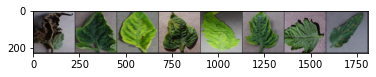

17777783


In [ ]:
%matplotlib inline

# function to show an image
def imshow(img):
  #img = img / 2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter1 = iter(train_loaders)
images, labels = next(dataiter1)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(''.join('%1s' % labels[j].numpy() for j in range(8)))

# Model

In [ ]:
#dir(models)

In [ ]:
model_googlenet = models.googlenet(pretrained=True)
print(model_googlenet)


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
from torchsummary import summary
model_googlenet.to(device)
summary(model_googlenet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
       BasicConv2d-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
       BasicConv2d-7           [-1, 64, 56, 56]               0
            Conv2d-8          [-1, 192, 56, 56]         110,592
       BatchNorm2d-9          [-1, 192, 56, 56]             384
      BasicConv2d-10          [-1, 192, 56, 56]               0
        MaxPool2d-11          [-1, 192, 28, 28]               0
           Conv2d-12           [-1, 64, 28, 28]          12,288
      BatchNorm2d-13           [-1, 64, 28, 28]             128
      BasicConv2d-14           [-1, 64,

#Training Model GoogLenet

In [ ]:
from torch.autograd import Variable
epoch_log_googlenet=[]
loss_log_googlenet=[]
accuracy_log_googlenet=[]

def saveModelgooglenet():
  path1 = "./tomato_googlenet.pth"
  torch.save(model_googlenet.state_dict(),path1)

def validationAccuracygooglenet():

  model_googlenet.eval()
  accuracy = 0.0
  total = 0.0

  with torch.no_grad():
    for data in valid_loaders:
      images, labels = data
      images, labels = images.to(device), labels.to(device)

      outputs = model_googlenet(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      accuracy += (predicted == labels).sum().item()

  accuracy = (100 * accuracy / total)
  return(accuracy)



def traingooglenet(num_epochs):
  best_accuracy = 0.0
  model_googlenet.to(device)

  for epoch in range(num_epochs):
    t0 = time.time()
    running_loss = 0.0
    running_accuracy = 0.0

    for i, (images, labels) in enumerate(train_loaders, 0):
      images = Variable(images.to(device))
      labels = Variable(labels.to(device))

      criterion = nn.CrossEntropyLoss()
      optimizer = optim.SGD(model_googlenet.fc.parameters(), lr = 0.001, momentum=0.9)

      optimizer.zero_grad()
      outputs = model_googlenet(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      if i % 1000 == 999:
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
        running_loss = 0.0

    accuracy = validationAccuracygooglenet()
    actual_loss = running_loss/1000
    epoch_log_googlenet.append(epoch)
    loss_log_googlenet.append(actual_loss)
    accuracy_log_googlenet.append(accuracy)
    print('For epoch', epoch+1,'the validation accuracy over the whole validation set is %d %% time taken - %.3f' % (accuracy, time.time()-t0))


    if accuracy > best_accuracy:
      saveModelgooglenet()
      best_accuracy = accuracy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imageshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def validationBatchgooglenet():
  images, labels = next(iter(valid_loaders))
  imageshow(torchvision.utils.make_grid(images))
  outputs = model_googlenet(images.to(device))
  _, predicted = torch.max(outputs, 1)

[1,  1000] loss: 3.370
For epoch 1 the validation accuracy over the whole validation set is 46 % time taken - 10271.435
[2,  1000] loss: 1.558
For epoch 2 the validation accuracy over the whole validation set is 59 % time taken - 133.466
[3,  1000] loss: 1.179
For epoch 3 the validation accuracy over the whole validation set is 66 % time taken - 130.230
[4,  1000] loss: 0.989
For epoch 4 the validation accuracy over the whole validation set is 70 % time taken - 130.322
[5,  1000] loss: 0.861
For epoch 5 the validation accuracy over the whole validation set is 73 % time taken - 130.158
[6,  1000] loss: 0.784
For epoch 6 the validation accuracy over the whole validation set is 76 % time taken - 130.335
[7,  1000] loss: 0.717
For epoch 7 the validation accuracy over the whole validation set is 77 % time taken - 130.564
[8,  1000] loss: 0.667
For epoch 8 the validation accuracy over the whole validation set is 79 % time taken - 128.871
[9,  1000] loss: 0.629
For epoch 9 the validation accu

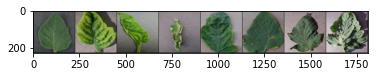

In [ ]:
if __name__== "__main__":
  traingooglenet(25)
  
  print('Finished Training .... ')

  model_googlenet = models.googlenet(pretrained=True)
  model_googlenet.to(device)
  path1 = "./tomato_googlenet.pth"
  model_googlenet.load_state_dict(torch.load(path1))

  validationBatchgooglenet()


In [ ]:
model_googlenet.eval()
correct = 0 
total = 0

with torch.no_grad():
    for data in valid_loaders:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_googlenet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the {valid} validation images: {accuracy:.3}%')

Accuracy of the network on the 1891 validation images: 87.5%


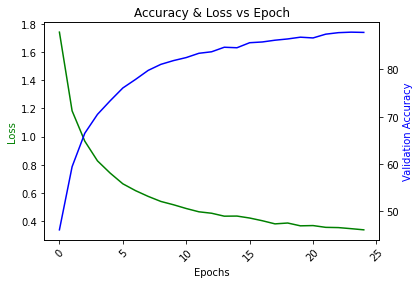

In [ ]:
# To create a plot with secondary y-axis we need to create a subplot
fig, ax1 = plt.subplots()

# Set title and x-axis label rotation
plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

# We use twinx to create a plot a secondary y axis
ax2 = ax1.twinx()

# Create plot for loss_log and accuracy_log
ax1.plot(epoch_log_googlenet, loss_log_googlenet, 'g-')
ax2.plot(epoch_log_googlenet, accuracy_log_googlenet, 'b-')

# Set labels
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Validation Accuracy', color='b')

plt.show()

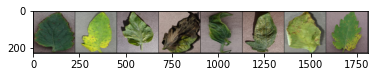

Ground Truth:  0, 7, 5, 2, 7, 5, 0, 4
Predicted:  0, 7, 5, 2, 7, 5, 0, 4


In [ ]:
dataiter = iter(test_loaders)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ', '.join('%1s' % labels[j].cpu().numpy() for j in range(8)))

images = images.to(device)
labels = labels.to(device)
output = model_googlenet(images)
_, predicted = torch.max(output, 1)
print('Predicted: ',', '.join('%1s' % labels[j].cpu().numpy() for j in range(8)))


In [ ]:
model_googlenet.eval()
correct = 0 
total = 0

with torch.no_grad():
    for data in test_loaders:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_googlenet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the {test} test images: {accuracy:.3}%')

Accuracy of the network on the 1902 test images: 89.3%


In [ ]:
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for x_batch, y_batch in test_loaders:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_test_pred = model_googlenet(x_batch)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())

In [ ]:
y_pred_list = [i[0] for i in y_pred_list]
y_true_list = [i[0] for i in y_true_list]

In [ ]:
# initialize a confusion matrix with 0s
confusion_matrix = torch.zeros(10, 10, dtype=torch.int32)
print(confusion_matrix.numpy())

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true_list, y_pred_list, target_names = test_data.classes))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.91      0.91      0.91        34
                        Tomato___Early_blight       0.62      0.62      0.62         8
                         Tomato___Late_blight       0.78      0.90      0.84        20
                           Tomato___Leaf_Mold       0.91      0.91      0.91        11
                  Tomato___Septoria_leaf_spot       0.86      0.86      0.86        22
Tomato___Spider_mites Two-spotted_spider_mite       0.85      0.88      0.86        25
                         Tomato___Target_Spot       1.00      0.83      0.91        18
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99        68
                 Tomato___Tomato_mosaic_virus       0.82      0.82      0.82        11
                             Tomato___healthy       1.00      0.95      0.97        20

                                     accu

In [ ]:
print(test_data.classes)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
print(confusion_matrix(y_true_list, y_pred_list))

[[31  0  1  0  1  0  0  1  0  0]
 [ 0  5  2  1  0  0  0  0  0  0]
 [ 0  1 18  0  0  0  0  0  1  0]
 [ 0  0  0 10  0  1  0  0  0  0]
 [ 2  1  0  0 19  0  0  0  0  0]
 [ 0  0  2  0  0 22  0  0  1  0]
 [ 0  1  0  0  0  2 15  0  0  0]
 [ 0  0  0  0  0  1  0 67  0  0]
 [ 0  0  0  0  2  0  0  0  9  0]
 [ 1  0  0  0  0  0  0  0  0 19]]


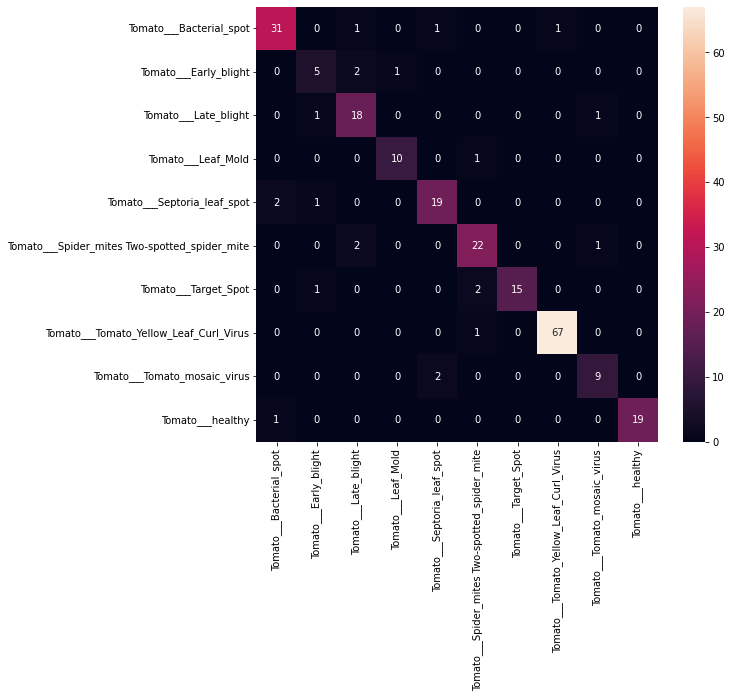

In [ ]:
import pandas as pd
import seaborn as sns
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true_list, y_pred_list), index = [i for i in test_data.classes] , columns = [i for i in test_data.classes])
fig, ax = plt.subplots(figsize=(9,8))         
sns.heatmap(confusion_matrix_df, annot=True, ax=ax)

GPU Used

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-0569a0ac-c597-faab-9387-367bab678407)


In [ ]:
!nvidia-smi

Sun Jan 22 12:27:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    28W /  70W |   1672MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------